In [118]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [119]:
print(tf.__version__)

2.3.0


### Read the Images 

In [120]:
import pathlib
dataset_url = "https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria/download/"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='cell_images',
                                   untar=True,
                                   archive_format='zip')

In [121]:
data_dir = pathlib.Path(data_dir)

In [122]:
print(data_dir)

C:\Users\Sandip\.keras\datasets\cell_images


In [123]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

27559


### Print some sample images 

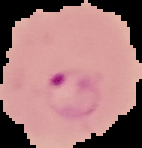

In [124]:
Parasitized = list(data_dir.glob('Parasitized/*'))
PIL.Image.open(str(Parasitized[0]))

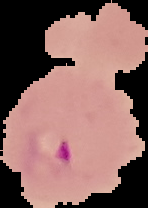

In [125]:
PIL.Image.open(str(Parasitized[1]))

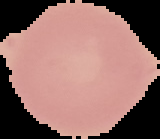

In [126]:
Uninfected = list(data_dir.glob('Uninfected/*'))
PIL.Image.open(str(Uninfected[0]))

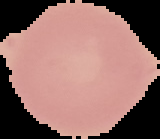

In [127]:
PIL.Image.open(str(Uninfected[0]))

In [128]:
import cv2
import matplotlib.pyplot as plt 
#import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

In [129]:
data = []
labels = []
for img in Parasitized:#0:20]:
    try:
        img_read = plt.imread(img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in Uninfected:#[0:20]:
    try:
        img_read = plt.imread(img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

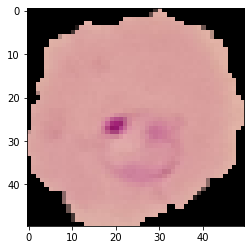

In [130]:
plt.imshow(data[0])
plt.show()

In [131]:
image_data = np.array(data)
labels = np.array(labels)

In [132]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [133]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [134]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [135]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (22046, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (5512, 50, 50, 3)
SHAPE OF TRAINING LABELS : (22046, 2)
SHAPE OF TESTING LABELS : (5512, 2)


In [136]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [137]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [138]:
#instantiate the model
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_9 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 11, 11, 32)       

In [139]:
#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [140]:
#fit the model onto the dataset
h = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
689/689 [==============================] - 358s 520ms/step - loss: 0.5590 - accuracy: 0.7561
Epoch 2/20
689/689 [==============================] - 341s 495ms/step - loss: 0.2169 - accuracy: 0.9188
Epoch 3/20
689/689 [==============================] - 319s 463ms/step - loss: 0.1803 - accuracy: 0.9386
Epoch 4/20
689/689 [==============================] - 279s 406ms/step - loss: 0.1674 - accuracy: 0.9434
Epoch 5/20
689/689 [==============================] - 284s 413ms/step - loss: 0.1626 - accuracy: 0.9459
Epoch 6/20
689/689 [==============================] - 287s 416ms/step - loss: 0.1590 - accuracy: 0.9468
Epoch 7/20
689/689 [==============================] - 279s 404ms/step - loss: 0.1592 - accuracy: 0.9470
Epoch 8/20
689/689 [==============================] - 280s 406ms/step - loss: 0.1514 - accuracy: 0.9501
Epoch 9/20
689/689 [==============================] - 276s 400ms/step - loss: 0.1485 - accuracy: 0.9521
Epoch 10/20
689/689 [==============================] - 276s 400m

In [141]:
model.save('Maleria1.h5')

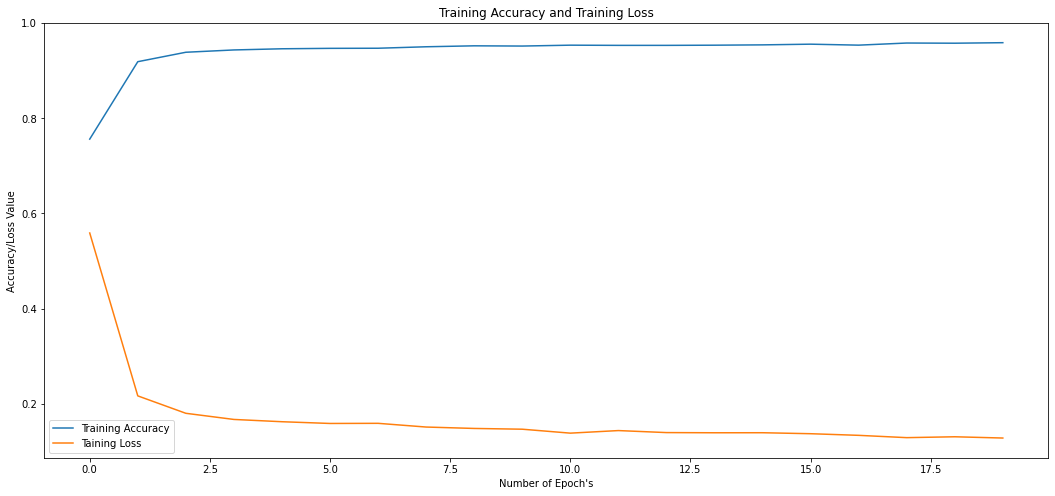

In [142]:
plt.figure(figsize = (18,8))
plt.plot(range(20), h.history['accuracy'], label = 'Training Accuracy')
plt.plot(range(20), h.history['loss'], label = 'Taining Loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

In [143]:
predictions = model.evaluate(x_test, y_test)

173/173 [==============================] - 35s 202ms/step - loss: 0.1785 - accuracy: 0.9497


In [144]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

LOSS : 0.1784786880016327
ACCURACY : 0.9497460126876831


### Load the Image to check whether Parasitized Or Uninfected

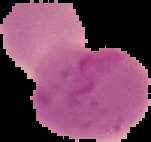

In [218]:
Sample = list(data_dir.glob('Predict/*'))
PIL.Image.open(str(Sample[0]))

In [219]:
predicted = list(data_dir.glob('Predict/*'))
predicted[0]
img_read = plt.imread(predicted[0])
img_resize = cv2.resize(img_read, (50, 50))
img_array = img_to_array(img_resize)
#img_array

In [220]:
image_data = np.array(img_array)

idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
#labels = labels[idx]
image_data = image_data.reshape(-1, 50, 50, 3)
print(f'SHAPE OF TRAINING IMAGE DATA : {image_data.shape}')

SHAPE OF TRAINING IMAGE DATA : (1, 50, 50, 3)


In [221]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import numpy as np
import warnings
warnings.simplefilter("ignore")

model = load_model('Maleria1.h5')
maleria = model.predict(image_data)

In [222]:
print(" Probability Having Parasitized :- " + str(pd.DataFrame(maleria).stack()[0][0]) )
print(" Probability Having Uninfected :- "  + str(pd.DataFrame(maleria).stack()[0][1]) )

 Probability Having Parasitized :- 0.84891516
 Probability Having Uninfected :- 0.15108481
